In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Levanto los datos


def crear_anio(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month < 12 else x.year + 1)
def crear_mes(datos,tag):
    return datos[tag].apply (lambda x : x.month)
def crear_col_indice(datos,tag,año_base):
    return datos[tag].apply (lambda x : x.year - año_base + x.month if x.month < 12 else x.year - año_base + x.month +1)


data_temperatura = pd.read_csv('../data/temperaturas_catedra/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])

data_lat_long = pd.read_csv('../data/long_lat/cities_lat_long.csv')

df = pd.merge(data_temperatura, data_lat_long, on=['City', 'Country'])


#df = df.dropna(axis=1, how='any')
#df = df.drop('iso2',1)
#df = df.drop('iso3', 1)
#df = df.drop('pop', 1)
#df = df.drop('Latitude', 1)
#df = df.drop('Longitude', 1)



In [80]:
df_testing = df

df_testing['month'] = crear_mes(df_testing, 'dt')
df_testing['year'] = crear_anio(df_testing, 'dt')


In [111]:
# Gráficos los datos

df_secas = df_testing[(df_testing['lat'] < 35) & (df_testing['lat'] > 30) & (df_testing['lng'] < 8) & (df_testing['lng'] > -10) & (df_testing['year'] == 2012)]
df_humedas = df_testing[(df_testing['lat'] < 44) & (df_testing['lat'] > 42.5) & (df_testing['lng'] < 0) & (df_testing['lng'] > -10) & (df_testing['year'] == 2012)]

#df_new = df_new[(df_new['month'] == 12) & (df_new['year'] == 2011)]

#grouped = df_new[(df_new['City'] != 'Venice') & (df_new['City'] != 'Baicheng') & (df_new['City'] != 'Tours')]

df_secas = df_secas[df_secas['City'] != 'Casablanca']

#df_humedas
#cityToPredict = df_humedas[(df_humedas['City'] == 'Bilbao') & (df_humedas['year'] == 2012)]
cityToPredict = df_secas[(df_secas['City'] == 'Marrakesh') & (df_secas['year'] == 2012)]

#grouped = df_secas.groupby(['month']).mean().reset_index()
grouped = df_humedas.groupby(['month']).mean().reset_index()







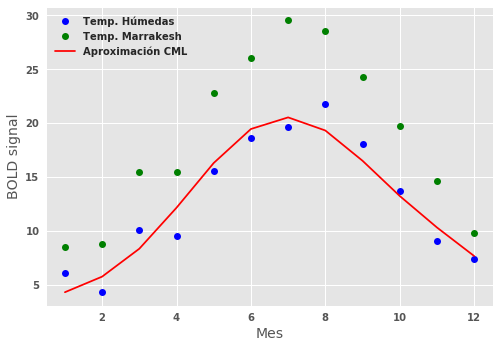

In [112]:
# Uso cuadrados mínimos para predecir
sns.tsplot(data=grouped['AverageTemperature'], time=grouped['month'], interpolate=False, color='b', value="BOLD signal", condition="Temp. Húmedas")
sns.tsplot(data=cityToPredict['AverageTemperature'], time=cityToPredict['month'], interpolate=False, color='g', value="BOLD signal", condition="Temp. Marrakesh")

font = {'family': 'normal', 'weight': 'bold', 'size': 20}

sns.plt.rc('font', **font)

sns.plt.rc('axes', labelsize=14)

plt.legend(loc='best', numpoints=1, handlelength=0)

#plt.title('Temperaturas por Mes en el año 2012')

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t**3, t, 1, np.sin(0.8*t - 10)])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df):
    regr = linear_model.LinearRegression(fit_intercept=False)
    
    
    # Entreno el modelo
    df_e = df
    A_e = armar_matriz_A(df_e['month'])
    regr.fit(A_e, df_e['AverageTemperature'])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    df_e['Mes'] = df_e['month']
    sns.tsplot(time=df_e['Mes'], data=df_e['p'], color='r', value="BOLD signal", condition="Aproximación CML")
    return 1

def predecir(k):
    return entrenar_y_predecir_en_rangos(grouped)
    
plt.ylabel('AVG Temperatura')
ECM = predecir(50)
sns.plt.xlim(0.5,12.5)
sns.plt.show()












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6